# Assignment 5
# Mohit Ram Sharma
# Roll number - 224161018

In [730]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Problem 1 (Stochastic Search)

In [185]:
def multimodal(x,y):
    z1=1.7*np.exp(-((((x-3)**2)/10)+(((y-3)**2)/10)))+np.exp(-((((x+5)**2)/8)+(((y+5)**2)/8)))+2*np.exp(-(((x**2)/4)+((y**2)/5)))
    z2=1.5*np.exp(-((((x-4)**2)/18)+(((y+4)**2)/16)))+1.2*np.exp(-((((x+4)**2)/18)+(((y-4)**2)/16)))
    return z1+z2

In [260]:
def stochasticSearch(X_min,X_max,popSize,nbhSize,maxItr):
    '''
    Performs stochastic search in the search space(rectangle defined by X_min and X_max)
    X_min=[[x_min],[y_min]] and X_max=[[x_max],[y_max]] are entered as numpy arrays of size 1x2.
    '''
    #Used for plotting
    x=np.arange(-10,10.1,0.1)
    y=np.arange(-10,10.1,0.1)
    z=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            z[i,j]=multimodal(x[i],y[j])
    x,y=np.meshgrid(x,y)
    # INITIALIZATION
    n=X_min.shape[0]
    m=popSize
    alphas=np.random.uniform(0,1,n*m)
    S=np.zeros((n,m))
    for i in range(m):
        for j in range(n):
                S[j,i]=(1-alphas[i*n+j])*X_min[j][0]+alphas[i*n+j]*X_max[j][0]
    # Plotting initial values
    fig=plt.figure(figsize=(7,5))
    ax=plt.axes()
    ax.contourf(x,y,z,cmap=cm.coolwarm)
    ax.scatter(S[0,:],S[1,:],color='red',)
    ax.set_title(f"Iteration number 0")
    
    # Performing iterations
    for iter in range(maxItr):            
        # Evaluating function on S
        Y = multimodal(S[0,:],S[1,:])
        # Evaluating solution fitness scores
        Y_min=Y.min()
        U=Y-Y_min
        U_sum=U.sum()
        P=U/U_sum # Fitness Scores

        # Children Generation by random walk
        children_list=[]
        for i in range(len(P)):
            m_i=round(P[i]*m)
            v=np.random.uniform(-1,1,n*m_i)
            lamda=nbhSize/2
            C_i=np.zeros((n,m_i))
            for j in range(m_i):
                for k in range(n):
                    C_i[k,j]=v[j*n+k]
            for j in range(m_i):
                C_i[:,j]=lamda*(C_i[:,j]/np.linalg.norm(C_i[:,j]))+S[:,i]
            children_list.append(C_i)
        # m/2 Children from Random linear combination
        rand_lin_comb=[]
        random_points=np.random.uniform(0,1,int(m/2))
        for k in range(int(m/2)):
            i=np.random.randint(0,m/2,1)[0]
            j=np.random.randint(0,m/2,1)[0]
            x_k=(1-random_points[k])*S[:,i]+random_points[k]*S[:,j]
            rand_lin_comb.append(x_k)
        alphas=np.random.uniform(0,1,n*m)
        random_reinitialize=np.zeros((n,m))
        for i in range(m):
            for j in range(n):
                    random_reinitialize[j,i]=(1-alphas[i*n+j])*X_min[j][0]+alphas[i*n+j]*X_max[j][0]

        # Joining all solutions
        all_soln=np.column_stack((S,random_reinitialize))
        for i in range(len(rand_lin_comb)):
            all_soln=np.column_stack((all_soln,rand_lin_comb[i]))
        for i in range(len(children_list)):
            all_soln=np.column_stack((all_soln,children_list[i]))
        evaluations=multimodal(all_soln[0,:],all_soln[1,:])
        # Top m solutions
        sorted_indices=np.flip(np.argsort(evaluations))
        S=all_soln[:,sorted_indices[:m]]
        
        # Plotting
        fig=plt.figure(figsize=(7,5))
        ax=plt.axes()
        ax.contourf(x,y,z,cmap=cm.coolwarm)
        ax.scatter(S[0,:],S[1,:],color='red',)
        ax.set_title(f"Iteration number {iter+1}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        
    bestX=S[0,0]
    bestY=S[1,0]
    maxF=multimodal(bestX,bestY)
    
    #Printing Final Solution
    fig=plt.figure(figsize=(7,5))
    ax=plt.axes()
    ax.contourf(x,y,z,cmap=cm.coolwarm)
    ax.scatter(bestX,bestY,color='red',)
    ax.set_title(f"Final Solution")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    print(f" Maximum value by SS is {maxF} and is attained at ({bestX},{bestY})")
    return bestX,bestY,maxF

## popSize=10, nbhSize=2, maxItr=7

 Maximum value by SS is 2.711286582801083 and is attained at (0.03786981733655197,0.26591555109590187)


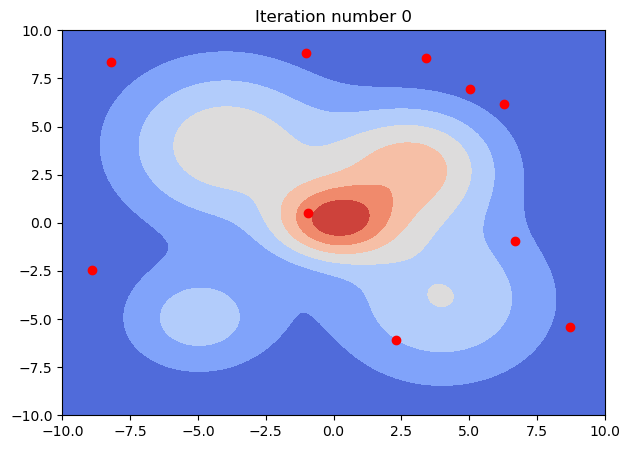

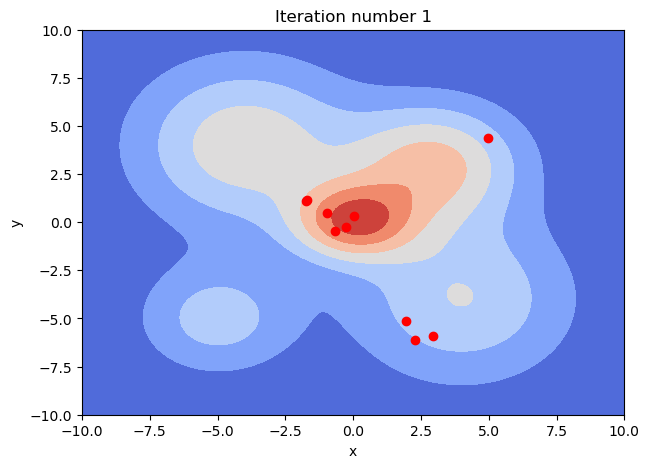

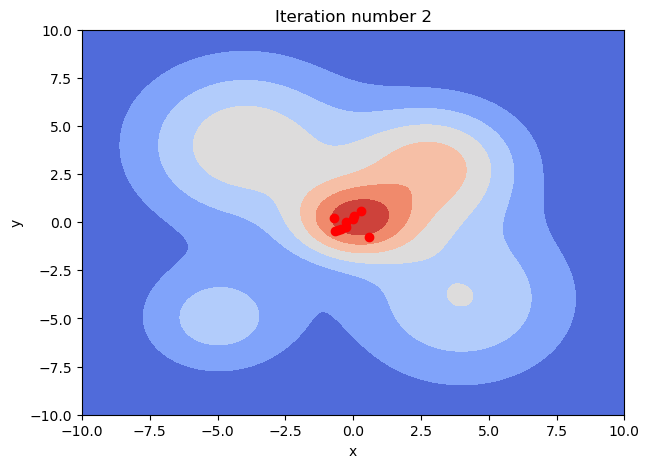

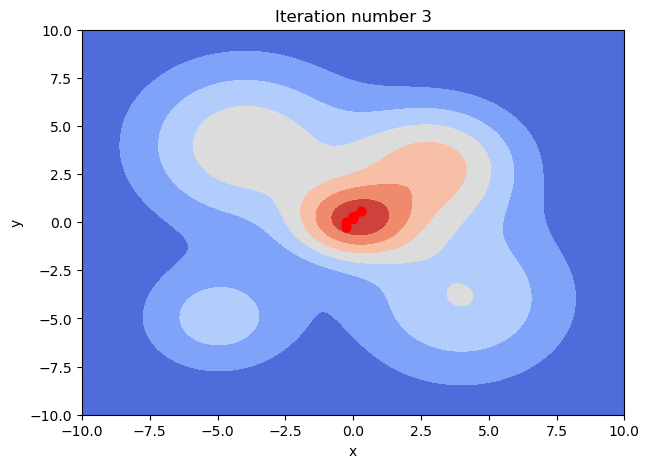

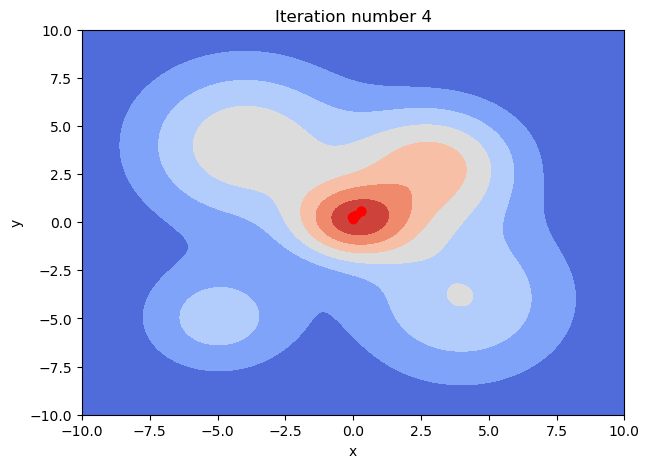

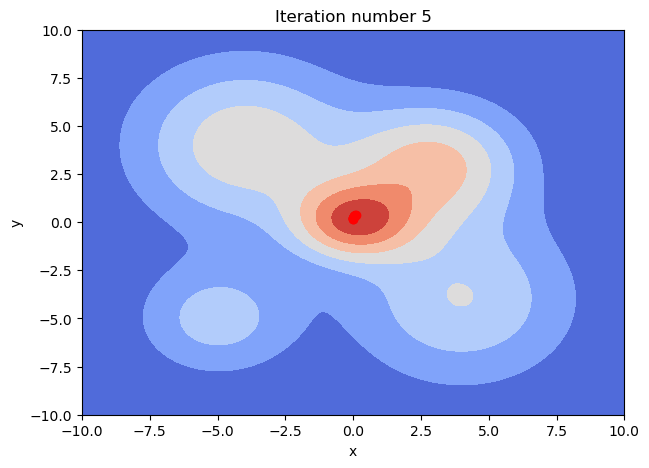

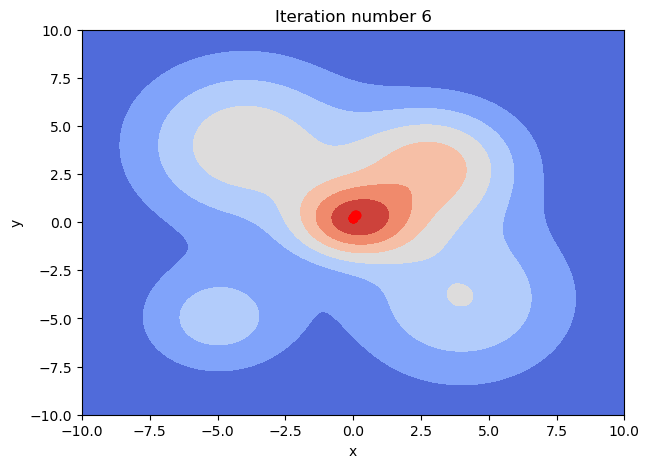

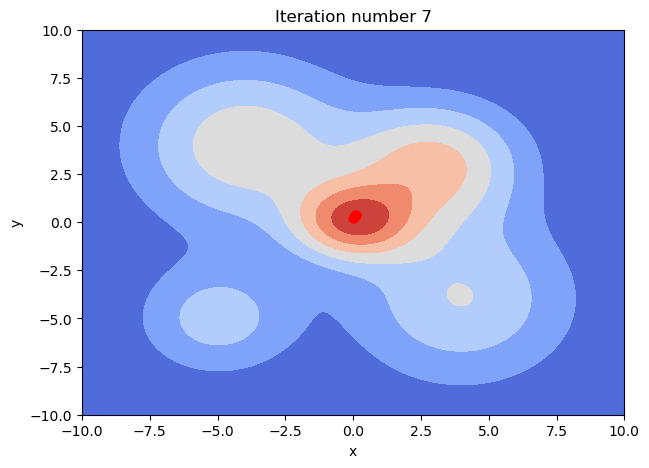

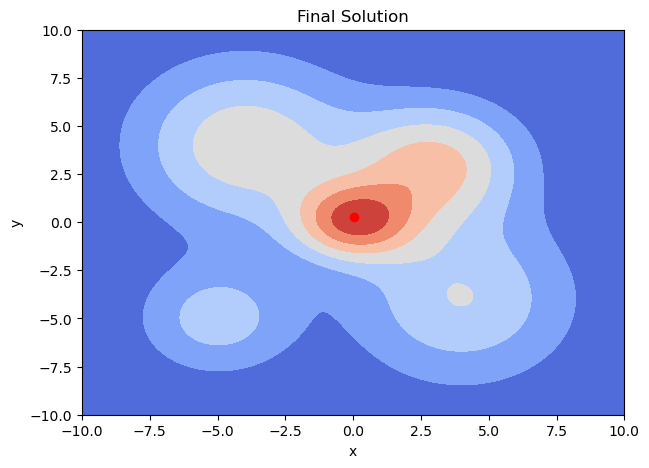

In [261]:
(bestX1,bestY1,maxF1)=stochasticSearch(X_min,X_max,10,2,7)

## popSize=100, nbhSize=5, maxItr=5

 Maximum value by SS is 2.725877033156491 and is attained at (0.20972382704392878,0.20139109616547268)


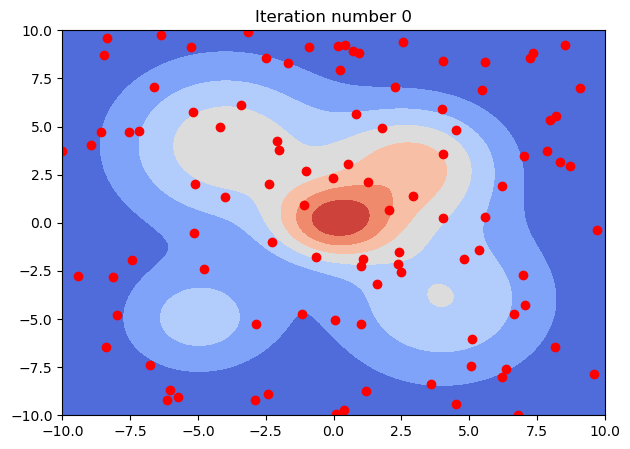

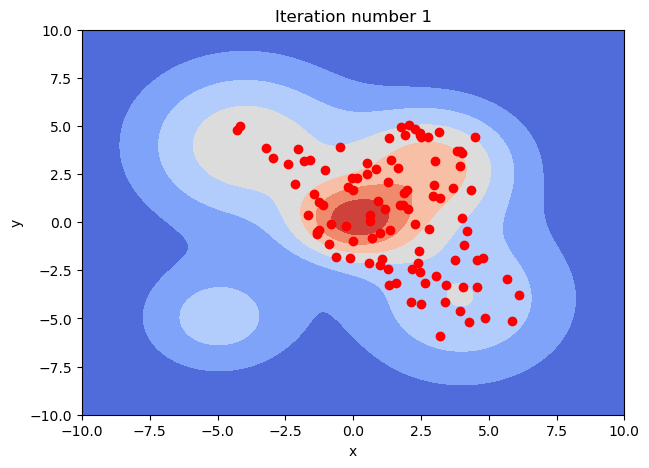

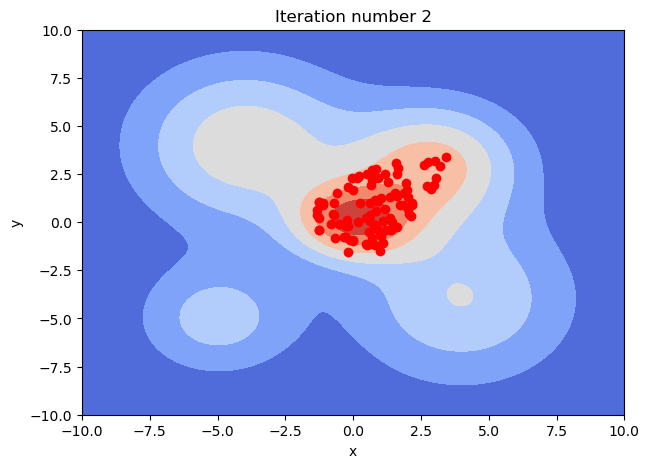

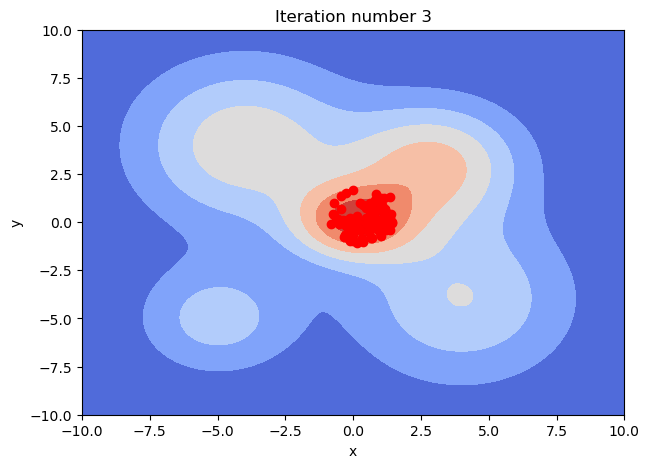

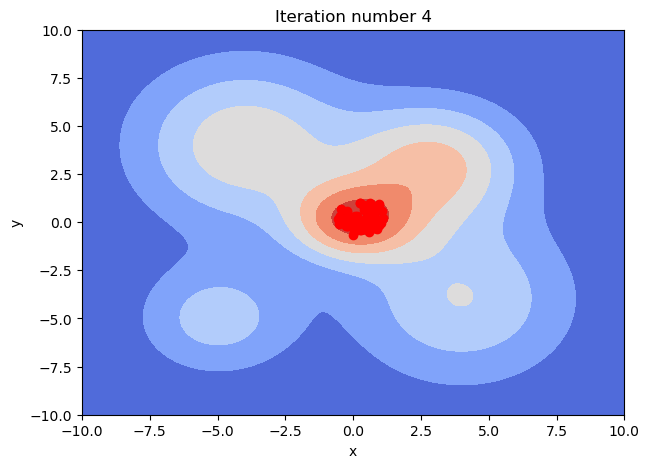

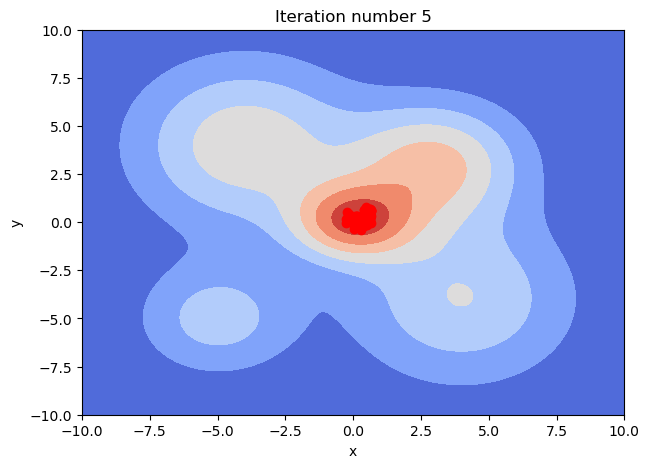

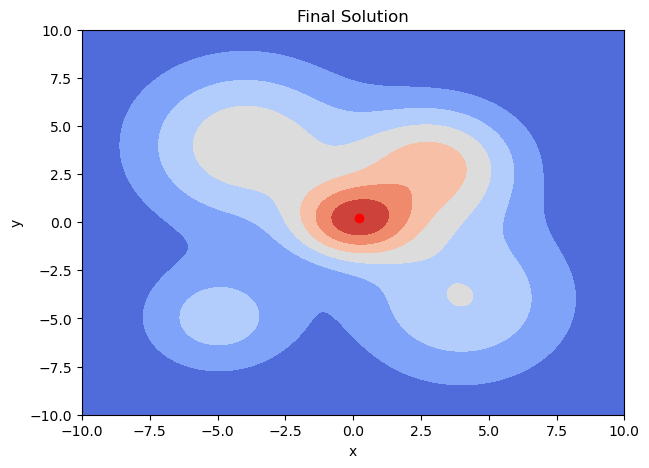

In [263]:
(bestX2,bestY2,maxF2)=stochasticSearch(X_min,X_max,100,5,5)

## popSize=40, nbhSize=0.5, maxItr=4

 Maximum value by SS is 2.7258413829020185 and is attained at (0.22300457481812136,0.22540739960117565)


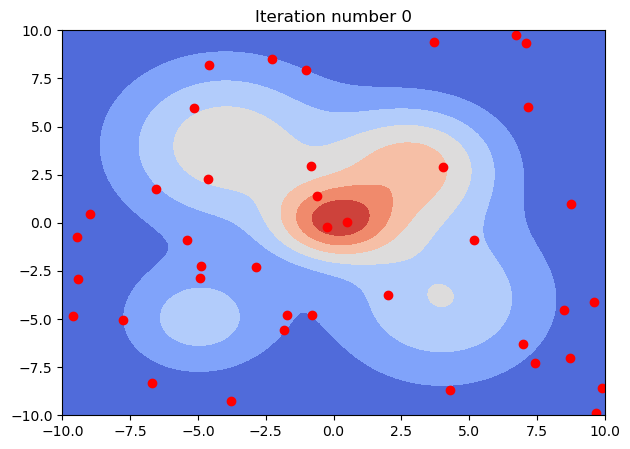

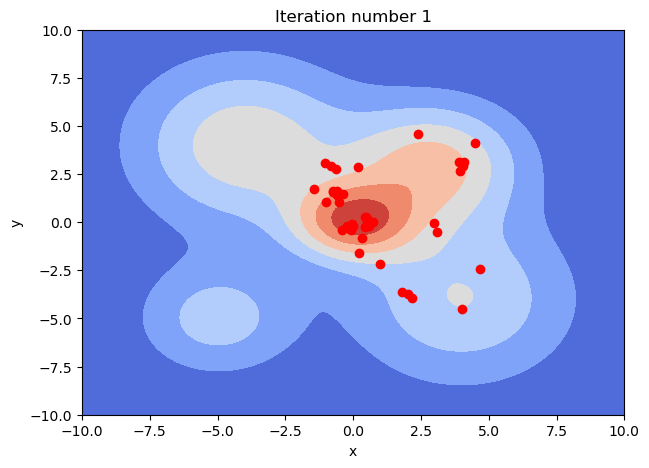

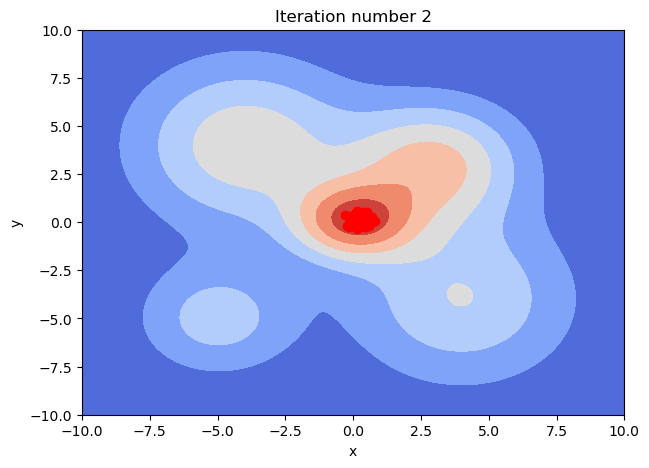

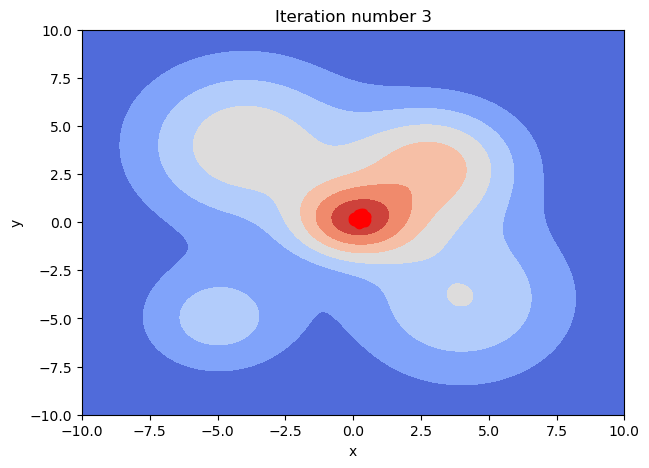

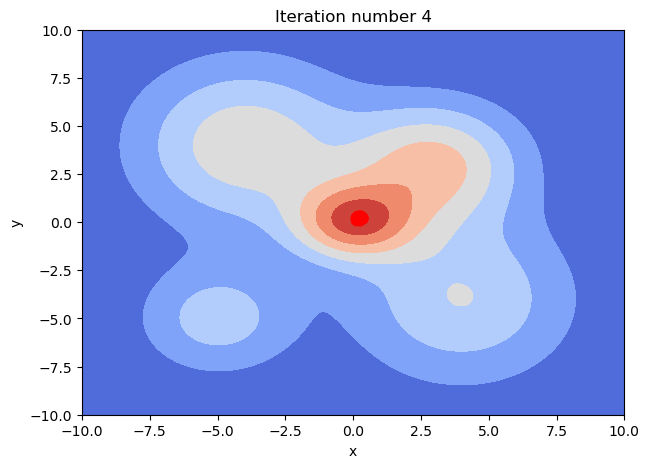

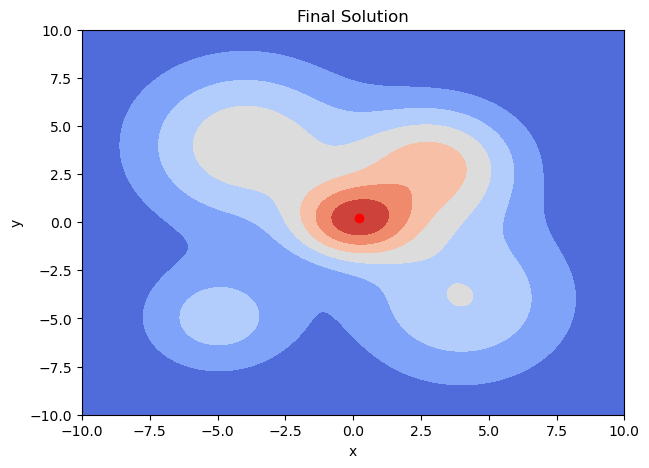

In [265]:
(bestX3,bestY3,maxF3)=stochasticSearch(X_min,X_max,40,0.5,4)

## popSize=1000, nbhSize=1, maxItr=1

 Maximum value by SS is 2.725579200802583 and is attained at (0.23515854967733182,0.19790171665693768)


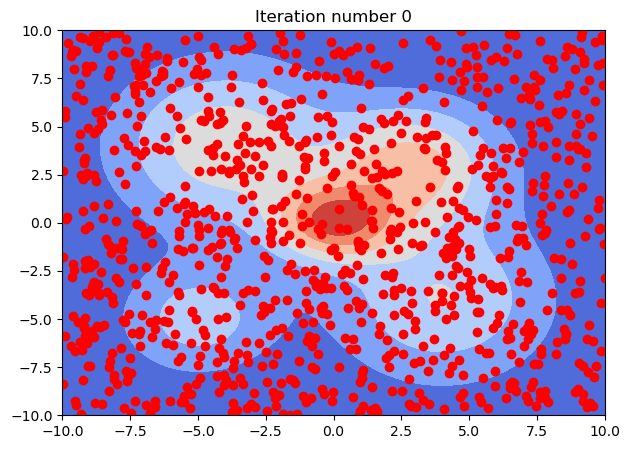

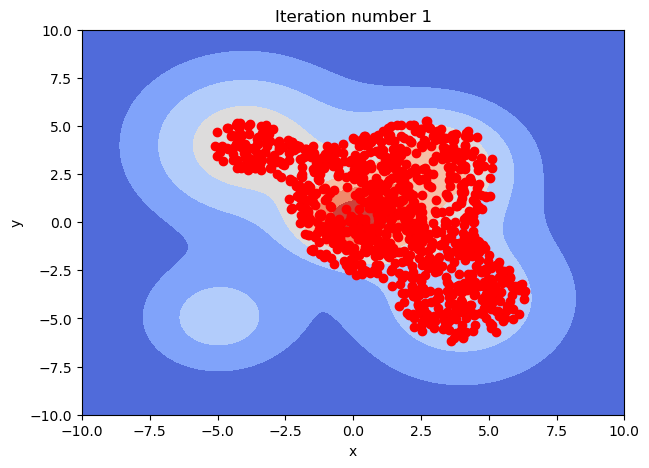

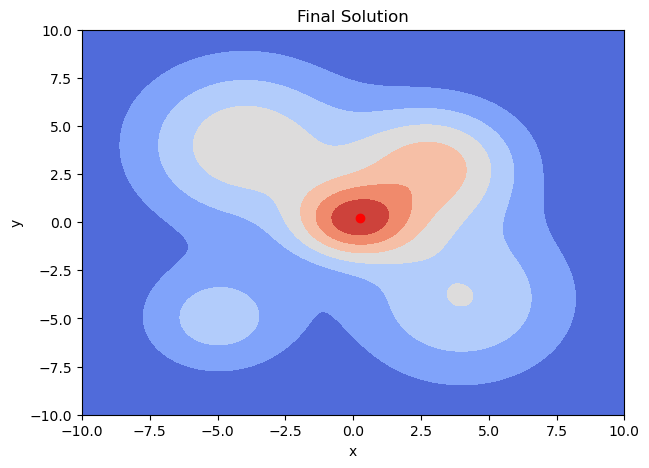

In [267]:
(bestX4,bestY4,maxF4)=stochasticSearch(X_min,X_max,1000,1,1)

In [268]:
solns=[maxF1,maxF2,maxF3,maxF4]
print(f"The best solution is {max(solns)}")

The best solution is 2.725877033156491


In [ ]:
f=open("att48_xy.txt",'r')
xy_list=f.readlines()
f.close()
xy_list=[word[:-1] for word in xy_list]
x_cord=np.array([int(word[:4]) for word in xy_list])
y_cord=np.array([int(word[5:]) for word in xy_list])
S=np.row_stack((x_cord,y_cord))

# Problem 2 (Travelling Salesman Problem)

In [778]:
f=open("att48_xy.txt",'r')
xy_list=f.readlines()
f.close()
xy_list=[word[:-1] for word in xy_list]
x_list=np.array([int(word[:4]) for word in xy_list])
y_list=np.array([int(word[5:]) for word in xy_list])
S=np.row_stack((x_list,y_list))

In [779]:
f=open("att48_d.txt",'r')
d_list=f.readlines()
f.close()
d_list=[word[:-1] for word in d_list]
d_list=[word.split("      ")for word in d_list]
d_list=[lst[1:] for lst in d_list]
for i in range(len(d_list)):
    for j in range(len(d_list[i])):
        d_list[i][j]=int(d_list[i][j])
distance=np.array(d_list) # Contains distance between coordinates

Text(0.5, 1.0, 'Locations')

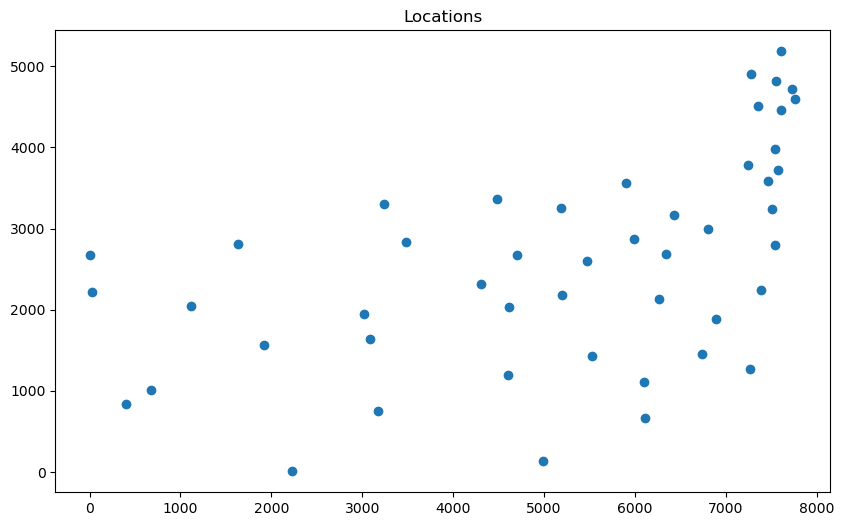

In [780]:
plt.figure(figsize=(10,6))
plt.scatter(x_list,y_list)
plt.title("Locations")

Best value at iteration 0 is 119889


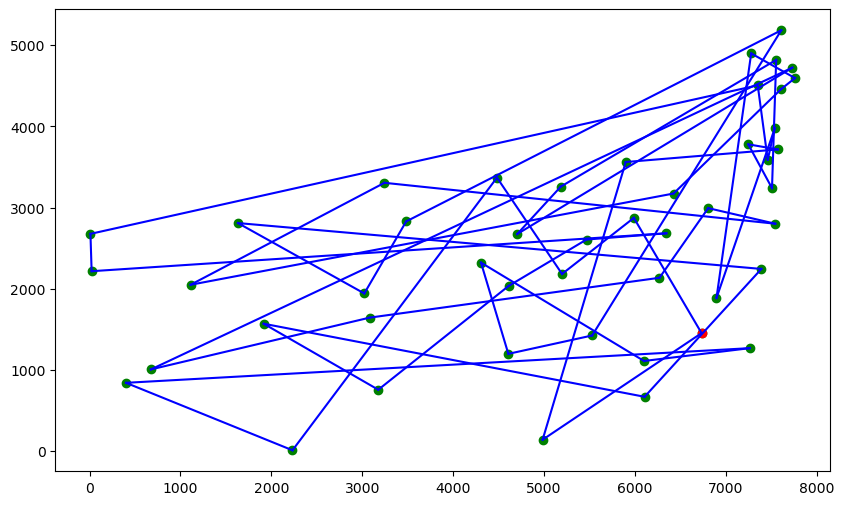

Best value at iteration 1 is 115075
Best value at iteration 2 is 114164
Best value at iteration 3 is 108121
Best value at iteration 4 is 107726
Best value at iteration 5 is 106190
Best value at iteration 6 is 102019
Best value at iteration 7 is 100519
Best value at iteration 8 is 98586
Best value at iteration 9 is 96983
Best value at iteration 10 is 94204
Best value at iteration 11 is 91742
Best value at iteration 12 is 90657
Best value at iteration 13 is 90657
Best value at iteration 14 is 85935
Best value at iteration 15 is 85935
Best value at iteration 16 is 85907
Best value at iteration 17 is 84025
Best value at iteration 18 is 82561
Best value at iteration 19 is 80978
Best value at iteration 20 is 78509
Best value at iteration 21 is 78509
Best value at iteration 22 is 77615
Best value at iteration 23 is 75756
Best value at iteration 24 is 75474
Best value at iteration 25 is 73827
Best value at iteration 26 is 73207
Best value at iteration 27 is 72257
Best value at iteration 28 is 

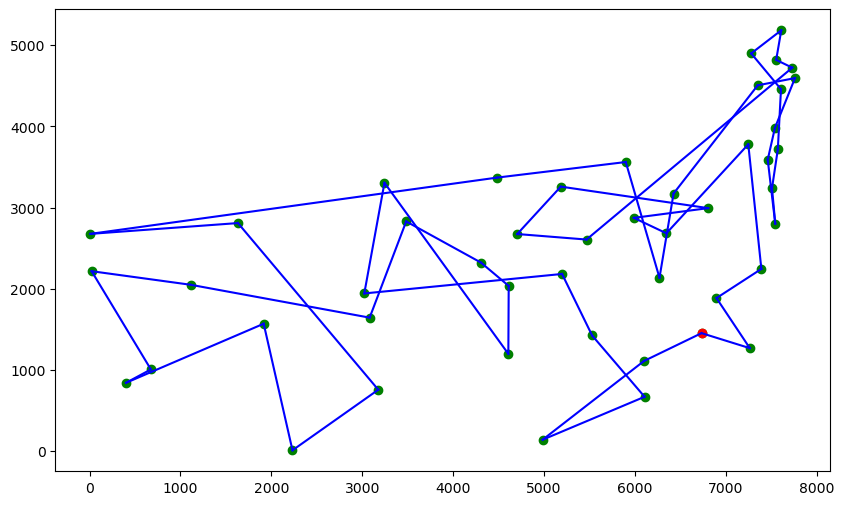

Best value at iteration 51 is 55457
Best value at iteration 52 is 55457
Best value at iteration 53 is 55409
Best value at iteration 54 is 54998
Best value at iteration 55 is 54998
Best value at iteration 56 is 53942
Best value at iteration 57 is 53942
Best value at iteration 58 is 53942
Best value at iteration 59 is 53497
Best value at iteration 60 is 53497
Best value at iteration 61 is 52400
Best value at iteration 62 is 52400
Best value at iteration 63 is 52400
Best value at iteration 64 is 52400
Best value at iteration 65 is 51946
Best value at iteration 66 is 51480
Best value at iteration 67 is 51343
Best value at iteration 68 is 50836
Best value at iteration 69 is 50492
Best value at iteration 70 is 49328
Best value at iteration 71 is 49328
Best value at iteration 72 is 49328
Best value at iteration 73 is 49328
Best value at iteration 74 is 49328
Best value at iteration 75 is 48999
Best value at iteration 76 is 48999
Best value at iteration 77 is 48999
Best value at iteration 78 i

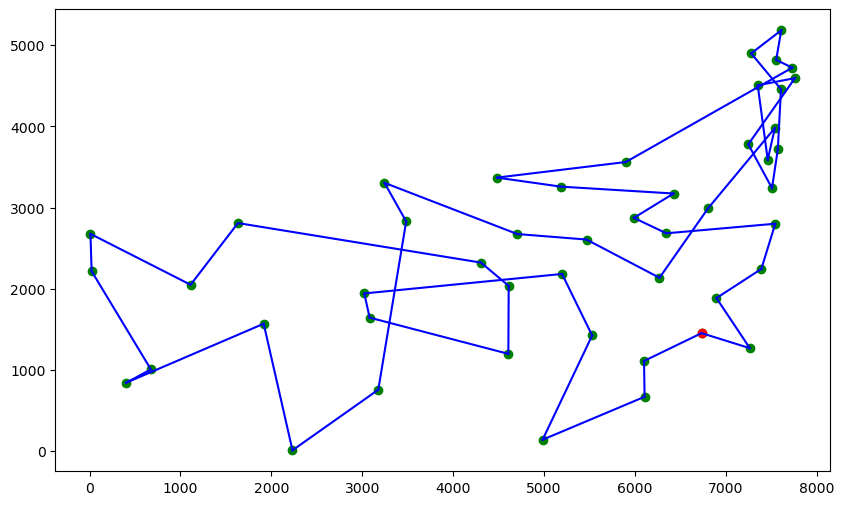

Best value at iteration 101 is 45925
Best value at iteration 102 is 45925
Best value at iteration 103 is 45925
Best value at iteration 104 is 45925
Best value at iteration 105 is 45925
Best value at iteration 106 is 45925
Best value at iteration 107 is 45925
Best value at iteration 108 is 45925
Best value at iteration 109 is 45925
Best value at iteration 110 is 45818
Best value at iteration 111 is 45818
Best value at iteration 112 is 45722
Best value at iteration 113 is 45421
Best value at iteration 114 is 45421
Best value at iteration 115 is 45110
Best value at iteration 116 is 45110
Best value at iteration 117 is 45110
Best value at iteration 118 is 45110
Best value at iteration 119 is 44506
Best value at iteration 120 is 44506
Best value at iteration 121 is 44506
Best value at iteration 122 is 44506
Best value at iteration 123 is 44506
Best value at iteration 124 is 44321
Best value at iteration 125 is 43559
Best value at iteration 126 is 43559
Best value at iteration 127 is 43559
B

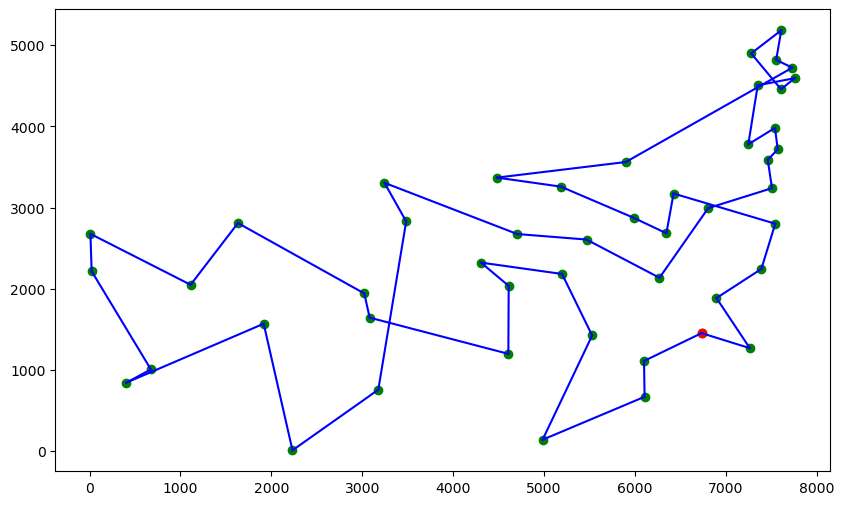

Best value at iteration 151 is 40160
Best value at iteration 152 is 40160
Best value at iteration 153 is 40160
Best value at iteration 154 is 40160
Best value at iteration 155 is 40160
Best value at iteration 156 is 40160
Best value at iteration 157 is 40160
Best value at iteration 158 is 40160
Best value at iteration 159 is 40160
Best value at iteration 160 is 40160
Best value at iteration 161 is 40160
Best value at iteration 162 is 40094
Best value at iteration 163 is 39910
Best value at iteration 164 is 39910
Best value at iteration 165 is 39910
Best value at iteration 166 is 39705
Best value at iteration 167 is 39705
Best value at iteration 168 is 39705
Best value at iteration 169 is 39705
Best value at iteration 170 is 39705
Best value at iteration 171 is 39705
Best value at iteration 172 is 39705
Best value at iteration 173 is 39705
Best value at iteration 174 is 39705
Best value at iteration 175 is 39705
Best value at iteration 176 is 39705
Best value at iteration 177 is 39705
B

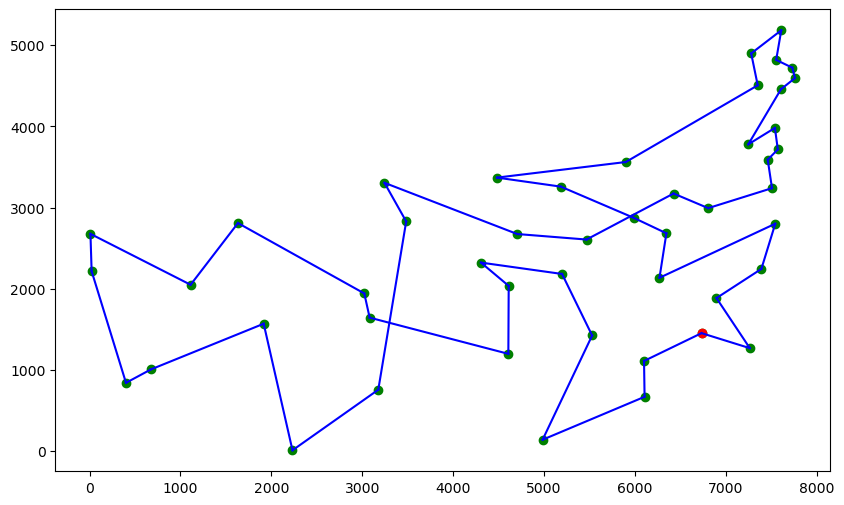

Best value at iteration 201 is 39439
Best value at iteration 202 is 39439
Best value at iteration 203 is 39439
Best value at iteration 204 is 39439
Best value at iteration 205 is 39439
Best value at iteration 206 is 39439
Best value at iteration 207 is 39430
Best value at iteration 208 is 39430
Best value at iteration 209 is 39430
Best value at iteration 210 is 39430
Best value at iteration 211 is 39430
Best value at iteration 212 is 39283
Best value at iteration 213 is 39283
Best value at iteration 214 is 39051
Best value at iteration 215 is 39017
Best value at iteration 216 is 39017
Best value at iteration 217 is 39017
Best value at iteration 218 is 39017
Best value at iteration 219 is 39017
Best value at iteration 220 is 39017
Best value at iteration 221 is 39017
Best value at iteration 222 is 39017
Best value at iteration 223 is 39017
Best value at iteration 224 is 38974
Best value at iteration 225 is 38974
Best value at iteration 226 is 38848
Best value at iteration 227 is 38848
B

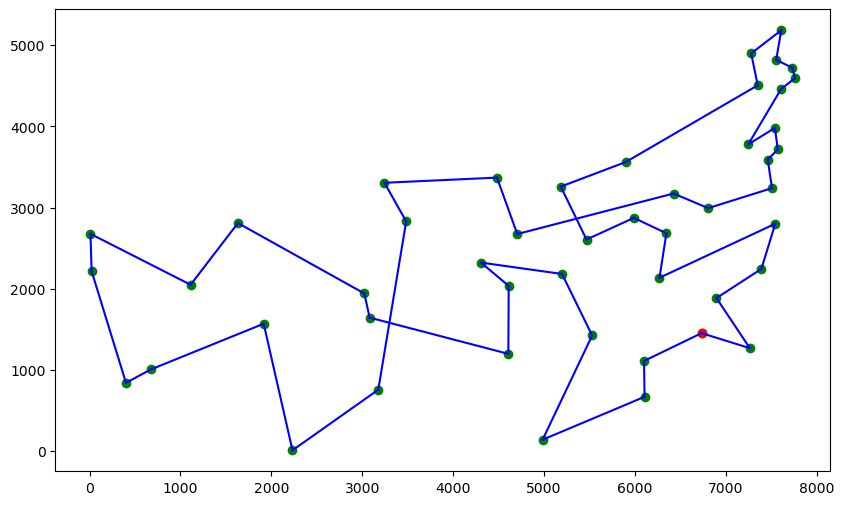

Best value at iteration 251 is 38769
Best value at iteration 252 is 38769
Best value at iteration 253 is 38769
Best value at iteration 254 is 38769
Best value at iteration 255 is 38747
Best value at iteration 256 is 38747
Best value at iteration 257 is 38747
Best value at iteration 258 is 38747
Best value at iteration 259 is 38747
Best value at iteration 260 is 38747
Best value at iteration 261 is 38747
Best value at iteration 262 is 38731
Best value at iteration 263 is 38731
Best value at iteration 264 is 38731
Best value at iteration 265 is 38731
Best value at iteration 266 is 38731
Best value at iteration 267 is 38619
Best value at iteration 268 is 38619
Best value at iteration 269 is 38619
Best value at iteration 270 is 38619
Best value at iteration 271 is 38619
Best value at iteration 272 is 38619
Best value at iteration 273 is 38563
Best value at iteration 274 is 38563
Best value at iteration 275 is 38563
Best value at iteration 276 is 38563
Best value at iteration 277 is 38563
B

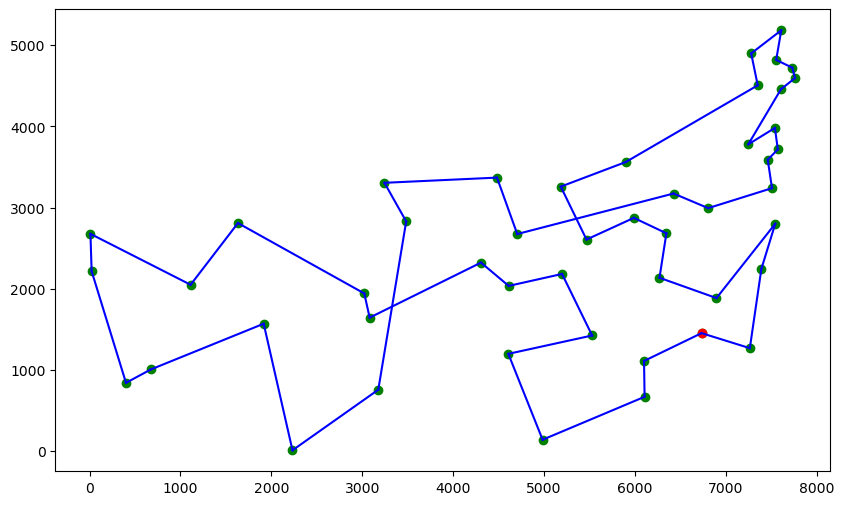

Best value at iteration 301 is 38140
Best value at iteration 302 is 38140
Best value at iteration 303 is 38140
Best value at iteration 304 is 38140
Best value at iteration 305 is 38140
Best value at iteration 306 is 38140
Best value at iteration 307 is 38140
Best value at iteration 308 is 38140
Best value at iteration 309 is 38140
Best value at iteration 310 is 38140
Best value at iteration 311 is 38140
Best value at iteration 312 is 38140
Best value at iteration 313 is 38140
Best value at iteration 314 is 38140
Best value at iteration 315 is 37918
Best value at iteration 316 is 37918
Best value at iteration 317 is 37918
Best value at iteration 318 is 37918
Best value at iteration 319 is 37918
Best value at iteration 320 is 37918
Best value at iteration 321 is 37918
Best value at iteration 322 is 37918
Best value at iteration 323 is 37918
Best value at iteration 324 is 37918
Best value at iteration 325 is 37918
Best value at iteration 326 is 37918
Best value at iteration 327 is 37918
B

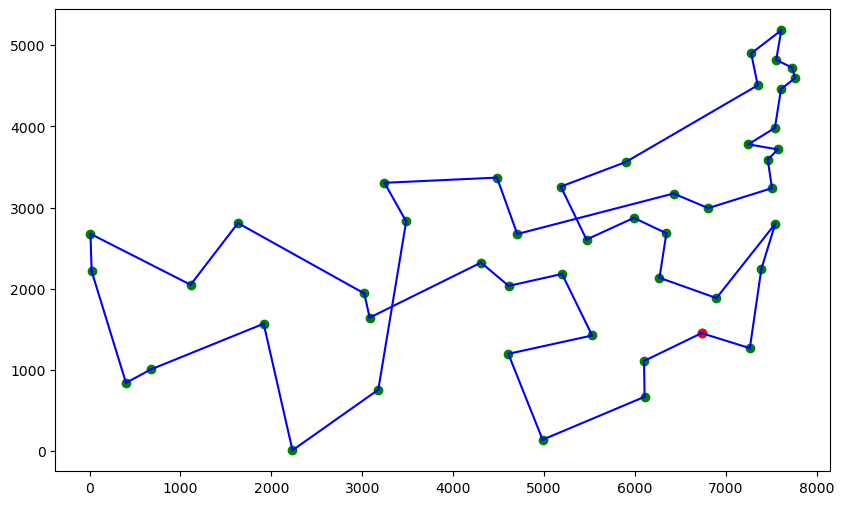

Best value at iteration 351 is 37918
Best value at iteration 352 is 37918
Best value at iteration 353 is 37918
Best value at iteration 354 is 37918
Best value at iteration 355 is 37918
Best value at iteration 356 is 37918
Best value at iteration 357 is 37354
Best value at iteration 358 is 37354
Best value at iteration 359 is 37354
Best value at iteration 360 is 37354
Best value at iteration 361 is 37354
Best value at iteration 362 is 37354
Best value at iteration 363 is 37354
Best value at iteration 364 is 37354
Best value at iteration 365 is 37354
Best value at iteration 366 is 37354
Best value at iteration 367 is 37354
Best value at iteration 368 is 37354
Best value at iteration 369 is 37354
Best value at iteration 370 is 37354
Best value at iteration 371 is 37354
Best value at iteration 372 is 37354
Best value at iteration 373 is 37354
Best value at iteration 374 is 37354
Best value at iteration 375 is 37354
Best value at iteration 376 is 37354
Best value at iteration 377 is 37354
B

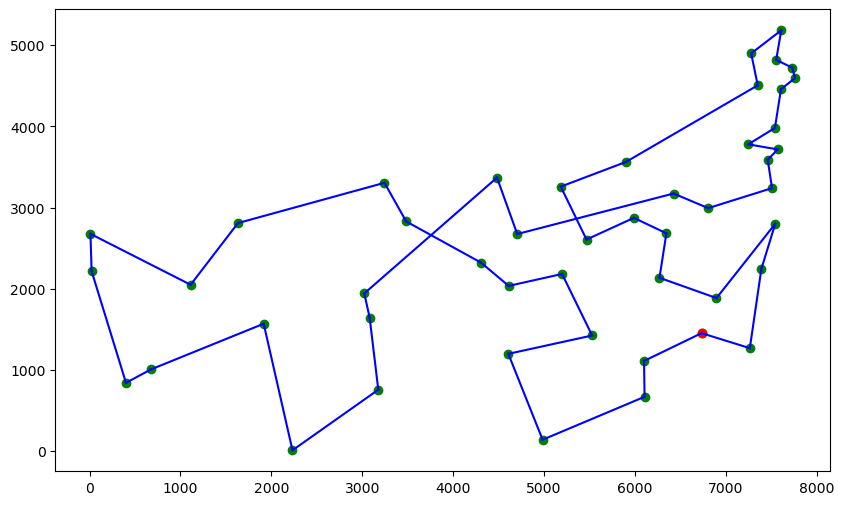

Best value at iteration 401 is 37132
Best value at iteration 402 is 37132
Best value at iteration 403 is 37132
Best value at iteration 404 is 37132
Best value at iteration 405 is 37132
Best value at iteration 406 is 37132
Best value at iteration 407 is 37132
Best value at iteration 408 is 37132
Best value at iteration 409 is 37132
Best value at iteration 410 is 37132
Best value at iteration 411 is 37132
Best value at iteration 412 is 37132
Best value at iteration 413 is 37088
Best value at iteration 414 is 37088
Best value at iteration 415 is 37088
Best value at iteration 416 is 37088
Best value at iteration 417 is 37088
Best value at iteration 418 is 37088
Best value at iteration 419 is 37088
Best value at iteration 420 is 37088
Best value at iteration 421 is 37088
Best value at iteration 422 is 37088
Best value at iteration 423 is 37088
Best value at iteration 424 is 37041
Best value at iteration 425 is 37041
Best value at iteration 426 is 37041
Best value at iteration 427 is 37041
B

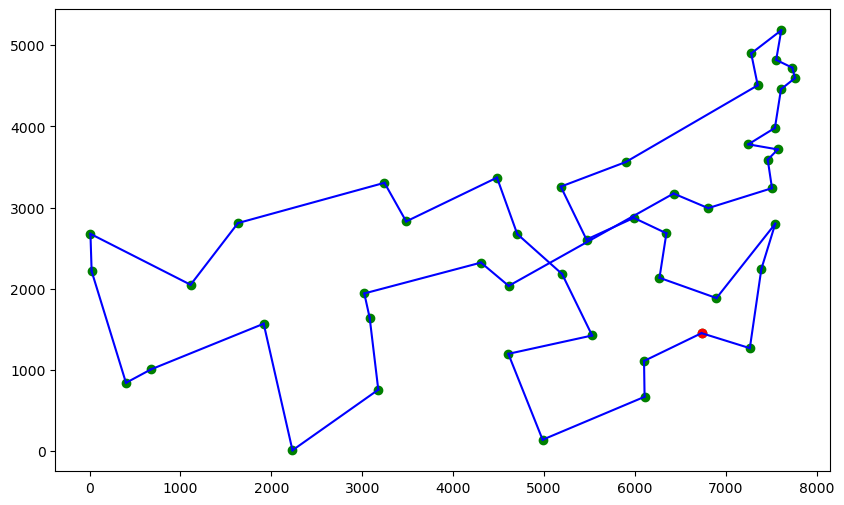

Best value at iteration 451 is 37041
Best value at iteration 452 is 37041
Best value at iteration 453 is 37041
Best value at iteration 454 is 37041
Best value at iteration 455 is 37041
Best value at iteration 456 is 37041
Best value at iteration 457 is 37041
Best value at iteration 458 is 37041
Best value at iteration 459 is 37041
Best value at iteration 460 is 37041
Best value at iteration 461 is 37041
Best value at iteration 462 is 37041
Best value at iteration 463 is 37041
Best value at iteration 464 is 37041
Best value at iteration 465 is 37041
Best value at iteration 466 is 37041
Best value at iteration 467 is 37041
Best value at iteration 468 is 37041
Best value at iteration 469 is 37041
Best value at iteration 470 is 37041
Best value at iteration 471 is 37041
Best value at iteration 472 is 37041
Best value at iteration 473 is 37041
Best value at iteration 474 is 37041
Best value at iteration 475 is 37041
Best value at iteration 476 is 37041
Best value at iteration 477 is 37041
B

Text(0.5, 1.0, 'Final Solution')

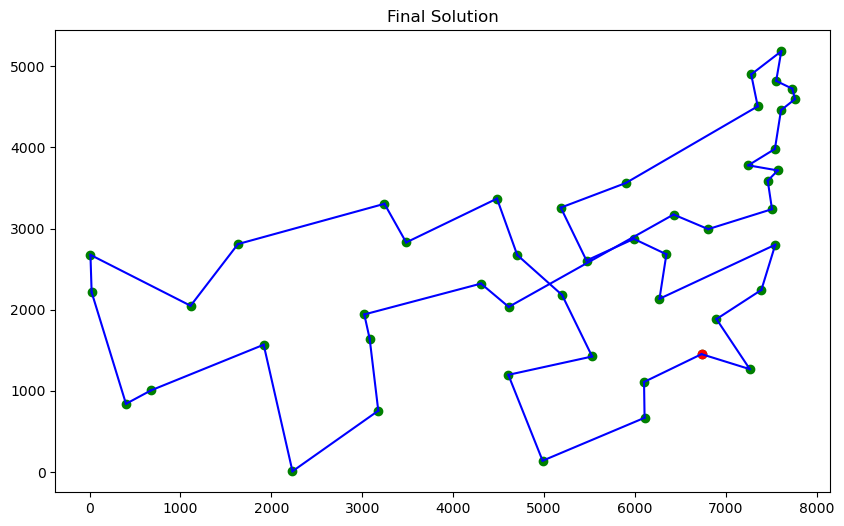

In [781]:
tour_indices=list(range(1,48))
m=1000
itr=500
K=50
s=np.random.permutation(tour_indices)
for i in range(m-1):
    s=np.column_stack((s,np.random.permutation(tour_indices)))

for it in range(itr):
    distance_list=[]
    for i in range(s.shape[1]):
        d=distance[0][s[0,i]]
        for j in range(1,len(s[:,i])):
            d+=distance[s[j-1,i]][s[j,i]]
        d+=distance[0][s[len(s[:,i])-1,i]]
        distance_list.append(-d)
    Y=np.array(distance_list)
    
    # Evaluating solution fitness scores
    Y_min=Y.min()
    U=Y-Y_min
    U_sum=U.sum()
    P=U/U_sum # Fitness Scores
    
    children_size=np.round(P*m)
    children_size[np.isnan(children_size)] = 0
    children_list=[]
    for i in range(m):
        if children_size[i]==np.NaN:
            print(0)
        for j in range(int(children_size[i])):
            indices=np.random.randint(0,47,2)
            k=indices[0]
            l=indices[1]
            s_child=s[:,i].copy()
            s_child[[k,l]]=s_child[[l,k]]
            children_list.append(s_child)
            
    all_soln=s.copy()
    for i in range(len(children_list)):
                all_soln=np.column_stack((all_soln,children_list[i]))    
    distance_all=[]
    for i in range(all_soln.shape[1]):
        d=distance[0][all_soln[0,i]]
        for j in range(1,len(all_soln[:,i])):
            d+=distance[all_soln[j-1,i]][all_soln[j,i]]
        d+=distance[0][all_soln[len(all_soln[:,i])-1,i]]
        distance_all.append(-d)
        
    Y=-(np.array(distance_all))
    s=all_soln[:,Y.argsort()[:m]].copy()
    best_sol=s[:,0]
    print(f"Best value at iteration {it} is {Y[Y.argsort()[0]]}")
    if it%K==0:
        plt.figure(figsize=(10,6))
        plt.scatter(x_list,y_list,color='green')
        plt.scatter(x_list[0],y_list[0],color='red') # Starting and ending point
        plt.plot([x_list[0],x_list[best_sol[0]]],[y_list[0],y_list[best_sol[0]]],color='blue')
        for i in range(1,len(best_sol)):
            plt.plot([x_list[best_sol[i-1]],x_list[best_sol[i]]],[y_list[best_sol[i-1]],y_list[best_sol[i]]],color='blue')
        plt.plot([x_list[0],x_list[best_sol[-1]]],[y_list[0],y_list[best_sol[-1]]],color='blue')
        plt.show()
        

plt.figure(figsize=(10,6))
plt.scatter(x_list,y_list,color='green')
plt.scatter(x_list[0],y_list[0],color='red') # Starting and ending point
plt.plot([x_list[0],x_list[best_sol[0]]],[y_list[0],y_list[best_sol[0]]],color='blue')
for i in range(1,len(best_sol)):
    plt.plot([x_list[best_sol[i-1]],x_list[best_sol[i]]],[y_list[best_sol[i-1]],y_list[best_sol[i]]],color='blue')
plt.plot([x_list[0],x_list[best_sol[-1]]],[y_list[0],y_list[best_sol[-1]]],color='blue')
plt.title("Final Solution")

Text(0.5, 1.0, 'Final Solution')

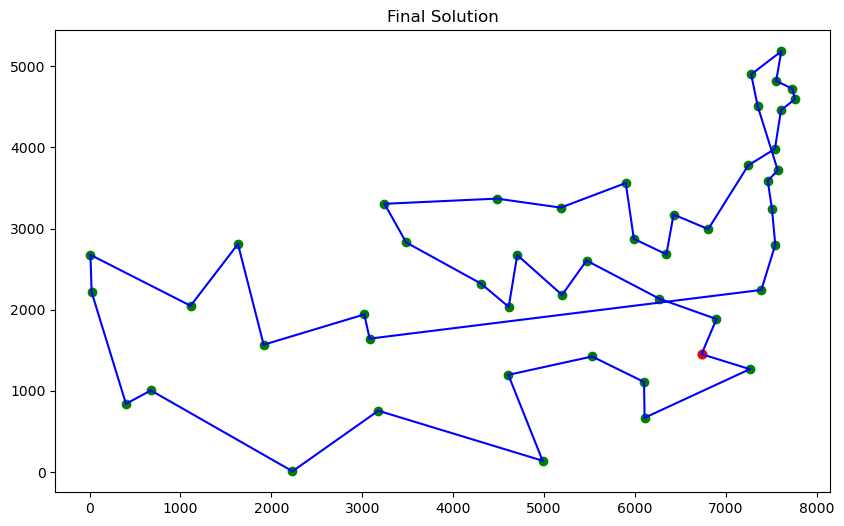

In [732]:
best_sol_overall=best_sol.copy()
best_score=37927
plt.figure(figsize=(10,6))
plt.scatter(x_list,y_list,color='green')
plt.scatter(x_list[0],y_list[0],color='red') # Starting and ending point
plt.plot([x_list[0],x_list[best_sol_overall[0]]],[y_list[0],y_list[best_sol_overall[0]]],color='blue')
for i in range(1,len(best_sol_overall)):
    plt.plot([x_list[best_sol_overall[i-1]],x_list[best_sol_overall[i]]],[y_list[best_sol_overall[i-1]],y_list[best_sol_overall[i]]],color='blue')
plt.plot([x_list[0],x_list[best_sol_overall[-1]]],[y_list[0],y_list[best_sol_overall[-1]]],color='blue')
plt.title("Final Solution")